# Plotting Total Power Data with Correct Time Representation
This is to solve the problem of wrapping the plot when cycling from 2300 to 000 hours

In [1]:
# Imports
import sys
import pandas as pd
import numpy as np
# my pandas dun tole me, to do da next line, baby yeahhh...
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Load the file
file_name = 'data_tp.csv'

try:
    # Read column 1 as dates
    #df = pd.read_csv(file_name,header=None, parse_dates=[1])
    df = pd.read_csv(file_name,header=None)
except FileNotFoundError:
    print('Please specify a valid path filename with --filename.')
    sys.exit()

In [3]:
df.head()

,0,1,2
0,2021-07-17,01:43:49,0.006877
1,2021-07-17,01:44:00,0.006558
2,2021-07-17,01:44:10,0.006413
3,2021-07-17,01:44:21,0.006308
4,2021-07-17,01:44:31,0.006223


In [4]:
# Combine the date and time column to a 3rd column which is date plus time
df[3] = df[0] + ' ' + df[1]

In [5]:
df.head()

,0,1,2,3
0,2021-07-17,01:43:49,0.006877,2021-07-17 01:43:49
1,2021-07-17,01:44:00,0.006558,2021-07-17 01:44:00
2,2021-07-17,01:44:10,0.006413,2021-07-17 01:44:10
3,2021-07-17,01:44:21,0.006308,2021-07-17 01:44:21
4,2021-07-17,01:44:31,0.006223,2021-07-17 01:44:31


In [6]:
df[3] = pd.to_datetime(df[3])

In [7]:
df[3]

0      2021-07-17 01:43:49
1      2021-07-17 01:44:00
2      2021-07-17 01:44:10
3      2021-07-17 01:44:21
4      2021-07-17 01:44:31
               ...        
3954   2021-07-17 13:17:45
3955   2021-07-17 13:17:56
3956   2021-07-17 13:18:06
3957   2021-07-17 13:18:17
3958   2021-07-17 13:18:28
Name: 3, Length: 3959, dtype: datetime64[ns]

In [8]:
x_axis = df[3]
y_axis = df[2]

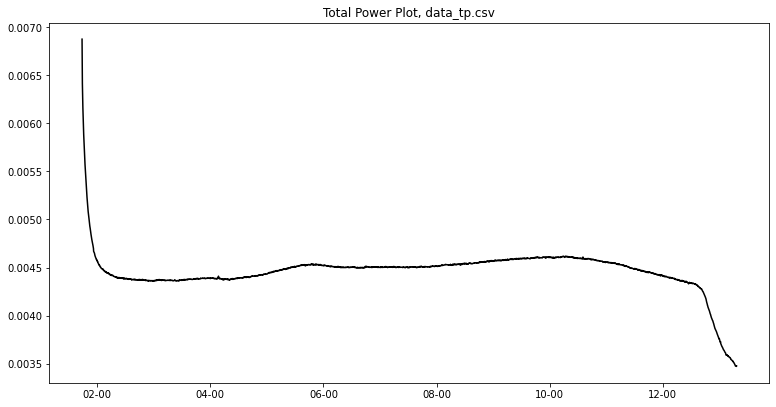

In [10]:
# Now try to plot
fig = plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1],title = f"Total Power Plot, {file_name}")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H-%M"))

ax.plot(x_axis, y_axis,label='testing', color='black')